# Wikidata query example

This notebook provides a simple demonstration of how to submit SPARQL queries to the Wikidata endpoint and generate a simple visualization of the results using python.

Import the needed python packages

In [42]:
import requests
import matplotlib.pyplot as plt

Map Wikdata `Q` identifiers to the 4 journal types we want to count.

In [8]:
journal_types = (
    ('Medical journal', 'Q16024164'),
    ('Academic journal', 'Q737498'),
    ('Open access journal', 'Q773668'),
    ('Scientific journal', 'Q5633421')
)

Defines Wikidata SPARQL endpoint.  Numerous query examples using this endpoint can be found on the [Wikidata examples page](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples).

In [9]:
wikidata_endpoint = 'https://query.wikidata.org/sparql'

`do_query` is a simple helper method for setting the HTTP header and submitting the request using the excellent python [requests](https://requests.readthedocs.io/en/master/) package.

In [56]:
def do_query(query):
    rsp = requests.post(
        wikidata_endpoint,
        data=query,
        headers={
            'Content-type': 'application/sparql-query',
            'Accept': 'application/sparql-results+json',
            'User-Agent': 'https://github.com/JSTOR-Labs/sw-dev-project'
        }
    )
    if rsp.status_code != 200:
        raise Exception(f"Query failed with status code {rsp.status_code}.")
    return rsp.json()

In this example four separate queries are used to generate a count of entities that are an `instance of` (property P31) 4 types of academic journal.  This same information could have been requested in a single SPARQL query using `GROUP BY` clause but Wikidata has become so large (now ~90M entities) that queries of that kind will often time out before completing.  More targeted queries are sometimes required to work around these timeouts. 

In [57]:

def journals_by_category():
    print('\nJournals by category:')
    labels = []
    counts = []
    for cat, qid in journal_types:
        labels.append(cat)
        query = '''
            SELECT (COUNT(?journal) AS ?count) WHERE {
              ?journal wdt:P31 wd:%s . # %s
            }
        ''' % (qid, cat)
        count = int(do_query(query)['results']['bindings'][0]['count']['value'])
        counts.append(count)
        print('  %s %s' % (cat, count))
    plt.pie(counts, labels=labels)
    plt.axis('equal')
    plt.show()

    plt.barh(labels, counts, align='center', alpha=0.5)
    plt.title('Journals by category')
    plt.show()



Journals by category:
  Medical journal 151
  Academic journal 18674
  Open access journal 11978
  Scientific journal 46517


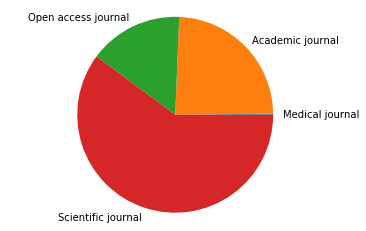

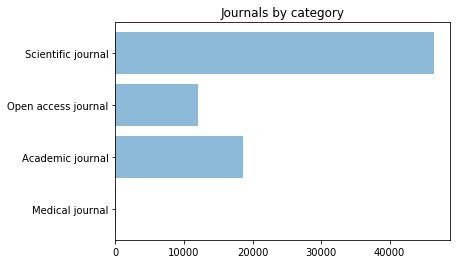

In [58]:
journals_by_category()